# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [16]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [23]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [24]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [62]:
image_url = 'https://cdn.entermedia.co.kr/news/photo/202005/10914_27367_543.jpg'

In [63]:
img = Image.open(BytesIO(requests.get(image_url).content))

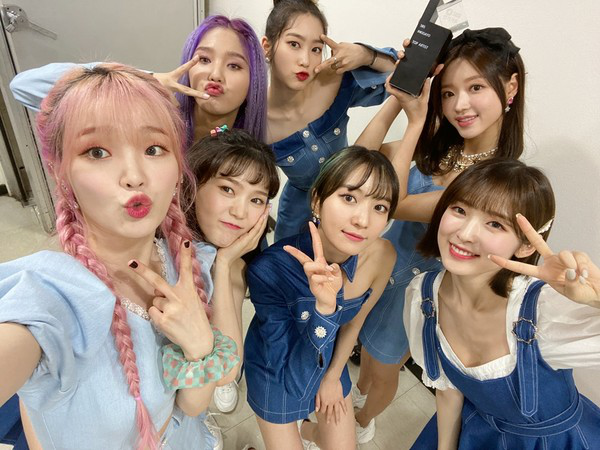

In [41]:
img

In [67]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
'returnFaceID': 'true',
'returnFaceAttributes': 'age, gender, emotion'
}

In [68]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인한다.

In [69]:
response = requests.post(faceDetection_url, headers=headers, params=params, json=data)

In [70]:
faces = response.json()

In [71]:
faces

[{'faceId': 'eeb53a0b-d88a-4b29-90e8-4cded22eb074',
  'faceRectangle': {'top': 117, 'left': 67, 'width': 125, 'height': 125},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.146,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.605,
    'sadness': 0.001,
    'surprise': 0.247}}},
 {'faceId': '95e6a9f5-cb13-4e1f-b446-860ea44e9802',
  'faceRectangle': {'top': 193, 'left': 430, 'width': 79, 'height': 79},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '56f79f7e-e1c0-46b2-9ae7-d14f30007938',
  'faceRectangle': {'top': 182, 'left': 324, 'width': 72, 'height': 72},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.017,
    'disgust': 0.0,
    'fear': 0.0,
    'happi

In [72]:
draw = ImageDraw.Draw(img)

In [73]:
for face in faces:
#     print(face)
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width, top+height)), outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = face_info['gender']
    result = 'Gender:' + gender + 'happiness:' + str(happiness * 100)
    
    draw.text((left, top), result, fill='red')

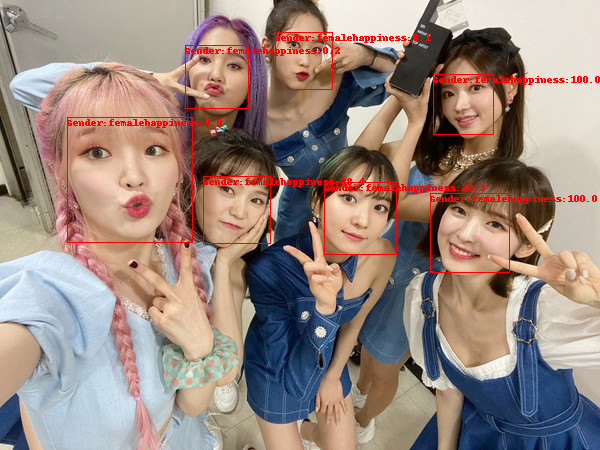

In [74]:
img